In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
fifa_data = pd.read_csv('fifa21_train.csv')

In [3]:
def FIFA(x):

    #Drop unnecessary columns:
    x = x.drop(['Name','Hits','ID','Joined', 'Contract','Team & Contract','Position', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Power', 'Jumping', 'Stamina', 'Long Shots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'GK Diving', 'GK Handling',  'GK Kicking', 'GK Positioning', 'GK Reflexes'], axis=1)
    
    #Cancel the ★ from the lines SM, W/F and IR
    x['SM']=x['SM'].str.replace('★','') 
    x['W/F']=x['W/F'].str.replace('★','')
    x['IR']=x['IR'].str.replace('★','')
    
    # Replace some of the titles with more understandable titles:
    x = x.rename(columns={'BP' : 'Best Position',
                                'A/W' : 'Attacking Workrate', 
                                'D/W':'Defensive Workrate', 
                                'IR' : 'International Reputation', 
                                'W/F' : 'Weak Foot', 
                                'SM' : 'Skill Move',
                                'Loan Date End' : 'On Loan',
                                'Weight': 'Weight in kg',
                                 'Height': 'Height in m'})
    
    #Some of the players perform better depending on the opponent team. We can remove these values
    #To get rid of the +1 etc. define a function:
    def split(y):
        y=y.str.split('+', n=1, expand=True)[0]
        return y
    
    #run the split function:
    cols = x[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK']]

    
    for i in cols:
        x[i] = split(cols[i])
        

    
    #Deal with NaN values: (Maybe change into yes and no)
    #On_Loan:
    x['On Loan']=x['On Loan'].fillna(0)

    
    numb = []
    for i in x['On Loan']:
        if i != 0:
            numb.append(1)
        else:
            numb.append(0)
    x['On Loan'] = numb
    
    
    #Attacking Workrate:
    x = x[x['Attacking Workrate'].isna()==False]
    
    #Club:
    x = x[x['Club'].isna()==False]
    
    
    
    #Convert units:
    ###lbs in kg:
    numb2=[]
    for i in x['Weight in kg']:
        i = i.replace('lbs','')
        i = float(i)*0.453592
        numb2.append(round(i,2))
                     
    x['Weight in kg'] = numb2

    
    #K and M in 1,000 and 1,000,000
    money_col= ['Value', 'Wage', 'Release Clause']
    numb3 = []

    for col in money_col:
        for i in x[col]:
            i = i.replace('€','')
        
            if i[-1] == 'K':
                i = i.replace('K','')
                i = int(i) * 1000
                numb3.append(i)
        
            elif i[-1] == 'M':
                i = i.replace('M','')
                i = float(i) * 1000000
                i = int(i)
                numb3.append(i)
            
            else:
                numb3.append(i)
        x[col] = numb3
        numb3 = []
    
    
    #x['Defensive Workrate'] = x['Defensive Workrate'].fillna("U")
    #x['Defensive Workrate'] = x['Defensive Workrate'].map({'Low':1,'Medium':2,'High':3, "U":0})
    #x['Attacking Workrate'] = x['Attacking Workrate'].fillna("U")
    #x['Attacking Workrate'] = x['Attacking Workrate'].map({'Low':1,'Medium':2,'High':3, "U":0})
    
    
    #Convert Feet and Inch into meter:
    x['Height 1'] = x['Height in m'].str.split("'", n = 1, expand = True)[0]
    x['Height 2'] = x['Height in m'].str.split("'", n = 0, expand = True)[0]



    numb4= []
    for i in x['Height 1']:
        i = float(i) * 30.48
        i = int(i)
        numb4.append(i)
    x['Height 1'] = numb4


    numb5= []
    for i in x['Height 2']:
        i = float(i) * 2.54
        i = int(i)
        numb5.append(i)
    x['Height 2'] = numb5

    x['Height in m'] = x['Height 1']+x['Height 2']
    
    x = x.drop(['Height 1', 'Height 2'], axis=1)
    
    
    #Change columns into numbers that seem to be object type:
    x = x.astype({'LS': 'int32', 'ST':'int32', 'RS':'int32', 'LW':'int32', 'LF':'int32', 'CF':'int32', 'RF':'int32', 
                  'RW':'int32', 'LAM':'int32', 'CAM':'int32', 'RAM':'int32', 'LM':'int32', 'LCM':'int32', 'CM':'int32', 
                  'RCM':'int32', 'RM':'int32', 'LWB':'int32', 'LDM': 'int32', 'Weak Foot':'int32', 'Skill Move':'int32', 
                  'International Reputation':'int32', 'Value':'int32','Wage':'int32', 'Release Clause':'int32',
                  'CDM':'int32','RDM' :'int32', 'RWB':'int32','LB':'int32','LCB':'int32', 'CB':'int32',
                  'RCB':'int32','RB':'int32','GK':'int32'})
    
    
    return x

In [4]:
pd.set_option('display.max_columns', 101)
fifa21 = FIFA(fifa_data)
display(fifa21)

,Age,Nationality,Club,Best Position,Height in m,Weight in kg,foot,Growth,On Loan,Value,Wage,Release Clause,Attacking,Skill,Movement,Power,Strength,Mentality,Defending,Goalkeeping,Total Stats,Base Stats,Weak Foot,Skill Move,Attacking Workrate,Defensive Workrate,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,26,Switzerland,FC Lausanne-Sport,CM,164,73.03,Right,1,0,525000,4000,801000,258,286,346,306,55,290,148,48,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,58,58,58,61,62,62,62,61,63,63,63,63,63,63,63,63,59,59,59,59,59,58,54,54,54,58,15,64
1,30,China PR,Beijing Sinobo Guoan FC,ST,197,72.12,Right,0,1,8500000,23000,0,365,375,404,372,74,313,77,55,1961,412,3,4,High,Low,2,83,75,68,82,33,71,77,77,77,77,77,77,77,77,76,76,76,76,68,68,68,76,57,53,53,53,57,53,48,48,48,53,18,77
2,33,Italy,Al Hilal,CAM,164,60.78,Right,0,0,9000000,49000,15300000,336,424,424,308,42,332,80,21,1925,404,4,4,High,Medium,2,80,77,78,86,27,56,73,73,73,80,79,79,79,80,80,80,80,79,74,74,74,79,59,56,56,56,59,53,41,41,41,53,12,80
3,22,Wales,Swansea City,CDM,164,68.95,Right,13,0,275000,4000,694000,242,259,282,277,58,257,168,42,1527,329,2,2,Medium,Medium,1,57,44,54,57,57,60,50,50,50,51,51,51,51,51,53,53,53,53,56,56,56,53,56,58,58,58,56,57,58,58,58,57,14,59
4,23,France,US Orléans Loiret Football,CDM,164,68.04,Right,8,0,725000,2000,1400000,249,280,324,280,61,294,185,52,1664,360,2,3,Low,Medium,1,66,44,60,64,60,66,56,56,56,59,59,59,59,59,61,61,61,62,63,63,63,62,64,64,64,64,64,63,61,61,61,63,15,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,29,Peru,Melgar FBC,ST,164,69.85,Right,0,0,550000,500,1200000,290,283,368,303,60,254,80,60,1638,337,3,3,High,Low,1,66,68,47,66,33,57,65,65,65,61,63,63,63,61,60,60,60,58,53,53,53,58,46,45,45,45,46,44,43,43,43,44,19,65
11696,25,Iceland,Jagiellonia Białystok,LB,197,76.20,Left,5,0,625000,3000,891000,224,248,333,273,68,266,184,61,1589,347,3,2,Medium,Medium,1,75,28,56,59,60,69,48,48,48,55,52,52,52,55,54,54,54,58,56,56,56,58,63,60,60,60,63,63,61,61,61,63,16,65
11697,27,France,ESTAC Troyes,GK,197,78.93,Right,4,0,1600000,4000,2900000,84,96,237,217,64,101,41,347,1123,387,2,1,Medium,Medium,1,72,67,66,72,40,70,28,28,28,24,26,26,26,24,24,24,24,25,25,25,25,25,25,26,26,26,25,24,26,26,26,24,69,70
11698,22,Chile,CD Antofagasta,RM,164,64.86,Right,8,0,1100000,2000,1700000,286,291,388,278,37,241,62,57,1603,337,3,3,High,Medium,1,76,60,60,72,26,43,62,62,62,67,65,65,65,67,65,65,65,66,58,58,58,66,49,44,44,44,49,45,35,35,35,45,17,67


# Split data into numerical and categorical

In [5]:
num_fifa21=fifa21._get_numeric_data()
cat_fifa21=fifa21.select_dtypes(include = object)

# Split numerical data into X and y

In [6]:
y = num_fifa21['OVA']
X = num_fifa21.drop(['OVA'], axis=1)

In [7]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,11628.0,2.524269e+01,4.936016e+00,16.00,21.00,25.00,29.00,4.300000e+01
Height in m,11628.0,1.800998e+02,1.649586e+01,164.00,164.00,164.00,197.00,1.970000e+02
Weight in kg,11628.0,7.509949e+01,7.173294e+00,53.07,69.85,74.84,79.83,1.102200e+02
Growth,11628.0,5.529928e+00,5.815522e+00,0.00,0.00,4.00,10.00,2.600000e+01
On Loan,11628.0,5.409357e-02,2.262120e-01,0.00,0.00,0.00,0.00,1.000000e+00
Value,11628.0,2.559741e+06,5.280173e+06,0.00,375000.00,800000.00,2500000.00,9.000000e+07
Wage,11628.0,1.050034e+04,2.126635e+04,0.00,1000.00,3000.00,11000.00,5.600000e+05
Release Clause,11628.0,4.555237e+06,1.014919e+07,0.00,508000.00,1300000.00,3900000.00,1.665000e+08
Attacking,11628.0,2.585728e+02,7.224548e+01,42.00,232.00,271.00,306.00,4.370000e+02
Skill,11628.0,2.665776e+02,7.683996e+01,43.00,232.00,279.00,319.00,4.700000e+02


# Try to improve

In [8]:
X= X.drop(['Release Clause', 'Wage','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'GK'], axis=1)

# Create correlation map

In [9]:
display(pd.DataFrame(X).corr())

,Age,Height in m,Weight in kg,Growth,On Loan,Value,Attacking,Skill,Movement,Power,Strength,Mentality,Defending,Goalkeeping,Total Stats,Base Stats,Weak Foot,Skill Move,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,RCM,RB
Age,1.000000,0.081016,0.254926,-0.862124,-0.095101,0.100287,0.192208,0.177155,-0.044934,0.319385,0.350510,0.279657,0.121812,0.119413,0.290609,0.415677,0.087272,0.080215,0.393209,-0.176885,0.309190,0.399716,0.240190,0.224831,0.434718,0.214171,0.155205
Height in m,0.081016,1.000000,0.631024,-0.041369,-0.002185,-0.000515,-0.301450,-0.394787,-0.540469,-0.102814,0.470113,-0.259571,-0.035654,0.289151,-0.314823,-0.113633,-0.134627,-0.371721,0.042630,-0.335577,-0.092346,-0.193205,-0.285295,0.090452,0.381739,-0.330192,-0.196606
Weight in kg,0.254926,0.631024,1.000000,-0.219849,-0.015769,0.035988,-0.252599,-0.353559,-0.541866,0.007087,0.645711,-0.199498,-0.040422,0.321454,-0.244992,0.003136,-0.119781,-0.351085,0.118884,-0.343080,0.011446,-0.102476,-0.212312,0.101418,0.538186,-0.285830,-0.182004
Growth,-0.862124,-0.041369,-0.219849,1.000000,0.084577,-0.186915,-0.282553,-0.263891,-0.100120,-0.429564,-0.372707,-0.350070,-0.158103,-0.050322,-0.396941,-0.518425,-0.105622,-0.165786,-0.282545,0.021180,-0.336441,-0.442387,-0.321819,-0.241184,-0.485544,-0.313323,-0.244675
On Loan,-0.095101,-0.002185,-0.015769,0.084577,1.000000,-0.022107,0.017397,0.017168,0.024761,-0.002456,-0.021565,-0.004353,-0.027359,-0.025483,-0.000816,-0.017555,0.007398,0.022845,-0.041130,0.026216,0.006680,-0.019164,0.018137,-0.041947,-0.038049,0.006665,-0.012850
Value,0.100287,-0.000515,0.035988,-0.186915,-0.022107,1.000000,0.286750,0.297913,0.260914,0.326924,0.132293,0.304437,0.125564,0.007544,0.390499,0.530321,0.152243,0.275570,0.483817,0.216069,0.327806,0.448138,0.445630,0.169417,0.266309,0.348447,0.246203
Attacking,0.192208,-0.301450,-0.252599,-0.282553,0.017397,0.286750,1.000000,0.928762,0.697225,0.824016,0.140598,0.889731,0.311129,-0.770294,0.903984,0.426754,0.355677,0.769898,0.237901,0.181468,0.350298,0.370443,0.379870,0.103638,0.107560,0.916152,0.646214
Skill,0.177155,-0.394787,-0.353559,-0.263891,0.017168,0.297913,0.928762,1.000000,0.730855,0.753674,0.007693,0.887501,0.370593,-0.716651,0.929220,0.501017,0.353726,0.792666,0.231417,0.217572,0.325563,0.514479,0.486317,0.172724,0.030961,0.950697,0.684199
Movement,-0.044934,-0.540469,-0.541866,-0.100120,0.024761,0.260914,0.697225,0.730855,1.000000,0.558868,-0.219878,0.614104,0.170112,-0.568129,0.738157,0.458274,0.282708,0.696800,0.055430,0.711839,0.233346,0.313523,0.504844,0.010162,-0.113720,0.699869,0.512469
Power,0.319385,-0.102814,0.007087,-0.429564,-0.002456,0.326924,0.824016,0.753674,0.558868,1.000000,0.478366,0.824684,0.360177,-0.575180,0.864539,0.575517,0.290303,0.582695,0.221385,0.157502,0.375953,0.357337,0.333306,0.249753,0.521107,0.805857,0.632907


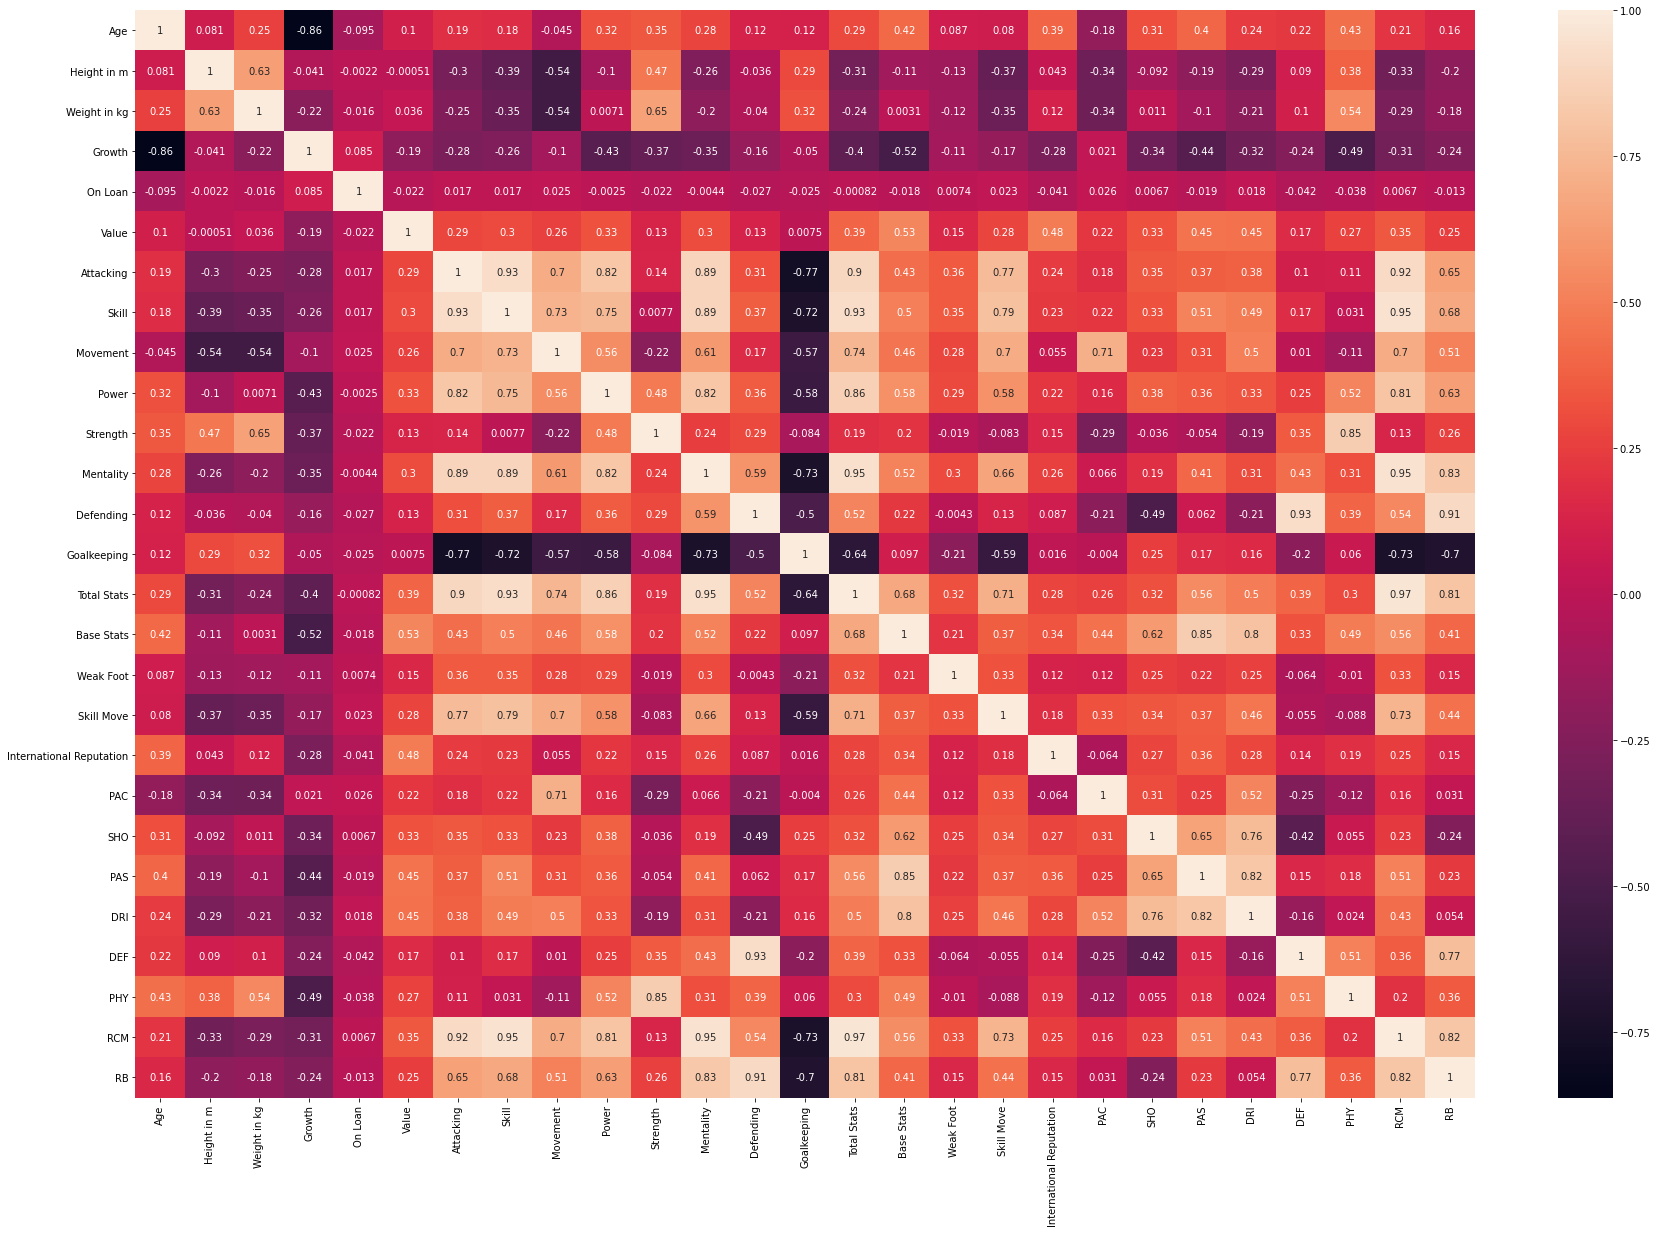

In [10]:
correlations_matrix = X.corr()
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# Normalize data

In [11]:
transformer = MinMaxScaler().fit(X)
X_normalized = transformer.transform(X)

X_fifa21 = pd.DataFrame(X_normalized, columns=X.columns)
display(X_fifa21)

,Age,Height in m,Weight in kg,Growth,On Loan,Value,Attacking,Skill,Movement,Power,Strength,Mentality,Defending,Goalkeeping,Total Stats,Base Stats,Weak Foot,Skill Move,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,RCM,RB
0,0.370370,0.0,0.349256,0.038462,0.0,0.005833,0.546835,0.569087,0.663818,0.556270,0.454545,0.654596,0.518219,0.084309,0.604577,0.492366,0.75,0.25,0.00,0.614286,0.447368,0.558824,0.522388,0.506494,0.515625,0.643836,0.637681
1,0.518519,1.0,0.333333,0.000000,1.0,0.094444,0.817722,0.777518,0.829060,0.768489,0.701299,0.718663,0.230769,0.100703,0.781945,0.702290,0.50,0.75,0.25,0.814286,0.763158,0.632353,0.805970,0.272727,0.687500,0.712329,0.565217
2,0.629630,0.0,0.134908,0.000000,0.0,0.100000,0.744304,0.892272,0.886040,0.562701,0.285714,0.771588,0.242915,0.021077,0.759059,0.671756,0.75,0.75,0.25,0.771429,0.789474,0.779412,0.865672,0.194805,0.453125,0.794521,0.565217
3,0.222222,0.0,0.277865,0.500000,0.0,0.003056,0.506329,0.505855,0.481481,0.463023,0.493506,0.562674,0.599190,0.070258,0.506039,0.385496,0.25,0.25,0.00,0.442857,0.355263,0.426471,0.432836,0.584416,0.515625,0.547945,0.623188
4,0.259259,0.0,0.261942,0.307692,0.0,0.008056,0.524051,0.555035,0.601140,0.472669,0.532468,0.665738,0.668016,0.093677,0.593134,0.503817,0.25,0.50,0.00,0.571429,0.355263,0.514706,0.537313,0.623377,0.609375,0.643836,0.710145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11623,0.481481,0.0,0.293613,0.000000,0.0,0.006111,0.627848,0.562061,0.726496,0.546624,0.519481,0.554318,0.242915,0.112412,0.576605,0.416031,0.50,0.50,0.00,0.571429,0.671053,0.323529,0.567164,0.272727,0.468750,0.506849,0.434783
11624,0.333333,1.0,0.404724,0.192308,0.0,0.006944,0.460759,0.480094,0.626781,0.450161,0.623377,0.587744,0.663968,0.114754,0.545455,0.454198,0.50,0.25,0.00,0.700000,0.144737,0.455882,0.462687,0.623377,0.656250,0.547945,0.710145
11625,0.407407,1.0,0.452493,0.153846,0.0,0.017778,0.106329,0.124122,0.353276,0.270096,0.571429,0.128134,0.085020,0.784543,0.249205,0.606870,0.25,0.00,0.00,0.657143,0.657895,0.602941,0.656716,0.363636,0.671875,0.123288,0.144928
11626,0.222222,0.0,0.206299,0.307692,0.0,0.012222,0.617722,0.580796,0.783476,0.466238,0.220779,0.518106,0.170040,0.105386,0.554355,0.416031,0.50,0.50,0.00,0.714286,0.565789,0.514706,0.656716,0.181818,0.250000,0.575342,0.449275


# Handle categorical data

In [12]:
X_cat = cat_fifa21
#display(X_cat.head())

# Try to improve 

In [13]:
X_cat = X_cat.drop(['Nationality', 'Club'], axis=1)

# Use OneHotEncoder for the categorical data

In [14]:
encoder = OneHotEncoder(drop='first').fit(X_cat)
cols = encoder.get_feature_names(input_features=X_cat.columns) 

#Transform the categorical data with the encoder and put it into a DataFrame
encoded = encoder.transform(X_cat).toarray()
encoded_fifa21 = pd.DataFrame(encoded,columns=cols)


display(encoded_fifa21)

,Best Position_CB,Best Position_CDM,Best Position_CF,Best Position_CM,Best Position_GK,Best Position_LB,Best Position_LM,Best Position_LW,Best Position_LWB,Best Position_RB,Best Position_RM,Best Position_RW,Best Position_RWB,Best Position_ST,foot_Right,Attacking Workrate_Low,Attacking Workrate_Medium,Defensive Workrate_Low,Defensive Workrate_Medium
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
11624,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
11625,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
11626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# Concatenate numerical and categorical again

In [15]:
X_num_cat= pd.concat([X_fifa21, encoded_fifa21], axis=1)

display(X_num_cat.head())

,Age,Height in m,Weight in kg,Growth,On Loan,Value,Attacking,Skill,Movement,Power,Strength,Mentality,Defending,Goalkeeping,Total Stats,Base Stats,Weak Foot,Skill Move,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,RCM,RB,Best Position_CB,Best Position_CDM,Best Position_CF,Best Position_CM,Best Position_GK,Best Position_LB,Best Position_LM,Best Position_LW,Best Position_LWB,Best Position_RB,Best Position_RM,Best Position_RW,Best Position_RWB,Best Position_ST,foot_Right,Attacking Workrate_Low,Attacking Workrate_Medium,Defensive Workrate_Low,Defensive Workrate_Medium
0,0.370370,0.0,0.349256,0.038462,0.0,0.005833,0.546835,0.569087,0.663818,0.556270,0.454545,0.654596,0.518219,0.084309,0.604577,0.492366,0.75,0.25,0.00,0.614286,0.447368,0.558824,0.522388,0.506494,0.515625,0.643836,0.637681,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.518519,1.0,0.333333,0.000000,1.0,0.094444,0.817722,0.777518,0.829060,0.768489,0.701299,0.718663,0.230769,0.100703,0.781945,0.702290,0.50,0.75,0.25,0.814286,0.763158,0.632353,0.805970,0.272727,0.687500,0.712329,0.565217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.629630,0.0,0.134908,0.000000,0.0,0.100000,0.744304,0.892272,0.886040,0.562701,0.285714,0.771588,0.242915,0.021077,0.759059,0.671756,0.75,0.75,0.25,0.771429,0.789474,0.779412,0.865672,0.194805,0.453125,0.794521,0.565217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.222222,0.0,0.277865,0.500000,0.0,0.003056,0.506329,0.505855,0.481481,0.463023,0.493506,0.562674,0.599190,0.070258,0.506039,0.385496,0.25,0.25,0.00,0.442857,0.355263,0.426471,0.432836,0.584416,0.515625,0.547945,0.623188,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.259259,0.0,0.261942,0.307692,0.0,0.008056,0.524051,0.555035,0.601140,0.472669,0.532468,0.665738,0.668016,0.093677,0.593134,0.503817,0.25,0.50,0.00,0.571429,0.355263,0.514706,0.537313,0.623377,0.609375,0.643836,0.710145,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_num_cat, y, test_size=0.2, random_state=24)
#X_train, X_test, y_train, y_test = train_test_split(X_fifa21, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9302, 46)
(2326, 46)
(9302,)
(2326,)


In [17]:
display(X_test.head())
display(y_test.head())

,Age,Height in m,Weight in kg,Growth,On Loan,Value,Attacking,Skill,Movement,Power,Strength,Mentality,Defending,Goalkeeping,Total Stats,Base Stats,Weak Foot,Skill Move,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,RCM,RB,Best Position_CB,Best Position_CDM,Best Position_CF,Best Position_CM,Best Position_GK,Best Position_LB,Best Position_LM,Best Position_LW,Best Position_LWB,Best Position_RB,Best Position_RM,Best Position_RW,Best Position_RWB,Best Position_ST,foot_Right,Attacking Workrate_Low,Attacking Workrate_Medium,Defensive Workrate_Low,Defensive Workrate_Medium
4306,0.185185,1.0,0.349256,0.461538,0.0,0.003056,0.511392,0.526932,0.615385,0.601286,0.623377,0.601671,0.582996,0.081967,0.579784,0.469466,0.5,0.25,0.00,0.571429,0.407895,0.470588,0.462687,0.558442,0.609375,0.589041,0.637681,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2690,0.296296,1.0,0.380927,0.153846,0.0,0.127778,0.678481,0.688525,0.763533,0.639871,0.714286,0.657382,0.238866,0.107728,0.671964,0.629771,0.5,0.75,0.00,0.742857,0.644737,0.705882,0.761194,0.207792,0.656250,0.753425,0.550725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9653,0.703704,0.0,0.293613,0.000000,0.0,0.002333,0.645570,0.531616,0.609687,0.591640,0.701299,0.596100,0.275304,0.098361,0.566434,0.458015,0.5,0.25,0.00,0.628571,0.592105,0.411765,0.507463,0.298701,0.609375,0.547945,0.449275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
672,0.518519,0.0,0.404724,0.000000,0.0,0.061111,0.769620,0.709602,0.772080,0.800643,0.688312,0.791086,0.433198,0.100703,0.793388,0.732824,0.5,0.50,0.00,0.728571,0.736842,0.661765,0.701493,0.467532,0.781250,0.739726,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1734,0.481481,0.0,0.277865,0.000000,0.0,0.094444,0.577215,0.634660,0.683761,0.659164,0.623377,0.646240,0.858300,0.098361,0.710108,0.629771,0.5,0.50,0.25,0.585714,0.289474,0.647059,0.611940,0.818182,0.734375,0.712329,0.898551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


4338    59
2713    77
9712    64
679     74
1747    78
Name: OVA, dtype: int64

In [18]:
#display(X_train.head())
#display(y_train.head())

# Linear Regression model

In [19]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [20]:
# Create the predictions
predictions = lm.predict(X_train)
predictions_test=lm.predict(X_test)

In [21]:
#Compare the first 5 Total Claim Amount values from the test data and the output of the prediction
print(y_test[:5])
print(predictions[:5])

4338    59
2713    77
9712    64
679     74
1747    78
Name: OVA, dtype: int64
[57.36657648 60.65329283 74.17153728 68.17026287 65.04272108]


In [22]:
print(r2_score(y_train, predictions))
print(r2_score(y_test, predictions_test))

0.879497658562086
0.884480909741933


In [23]:
mse=mean_squared_error(y_test, predictions_test)
rmse= np.sqrt(mse)

print(rmse)

2.3291597841073663


# Import new data and estimate RMSE

In [24]:
new_data = pd.read_csv('fifa21_validate.csv')

In [25]:
X_new=FIFA(new_data)

In [26]:
#splitting numerical and categorical
num_X_new=X_new._get_numeric_data()
cat_X_new=X_new.select_dtypes(include = object)

In [27]:
# Splitting X and y
y_new = num_X_new['OVA']
num_X_new = num_X_new.drop(['OVA'], axis=1)

In [28]:
#Dropping values
num_X_new= num_X_new.drop(['Wage', 'Release Clause','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'GK'], axis=1)
cat_X_new = cat_X_new.drop(['Nationality', 'Club'], axis=1)

In [29]:
#Normalize
transformer2 = MinMaxScaler().fit(num_X_new)
X_normalized_new = transformer2.transform(num_X_new)

X_fifa21_new = pd.DataFrame(X_normalized_new, columns=X.columns)
display(X_fifa21_new)

,Age,Height in m,Weight in kg,Growth,On Loan,Value,Attacking,Skill,Movement,Power,Strength,Mentality,Defending,Goalkeeping,Total Stats,Base Stats,Weak Foot,Skill Move,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,RCM,RB
0,0.225806,1.0,0.694427,0.28,1.0,0.012500,0.509804,0.463158,0.535503,0.541219,0.911765,0.517906,0.708502,0.097156,0.526038,0.338710,0.25,0.25,0.000000,0.531250,0.138889,0.328125,0.327869,0.688312,0.719298,0.521739,0.686567
1,0.193548,0.0,0.323944,0.20,0.0,0.015385,0.700280,0.731579,0.748521,0.666667,0.323529,0.628099,0.145749,0.090047,0.641397,0.435484,0.75,0.50,0.000000,0.687500,0.652778,0.515625,0.721311,0.142857,0.421053,0.666667,0.447761
2,0.096774,1.0,0.527659,0.68,0.0,0.001538,0.000000,0.000000,0.127219,0.121864,0.426471,0.049587,0.008097,0.601896,0.036256,0.181452,0.25,0.00,0.000000,0.406250,0.444444,0.375000,0.409836,0.168831,0.350877,0.043478,0.014925
3,0.000000,1.0,0.472137,0.92,0.0,0.002051,0.467787,0.452632,0.452663,0.376344,0.485294,0.473829,0.542510,0.049763,0.413975,0.213710,0.50,0.25,0.000000,0.437500,0.194444,0.281250,0.360656,0.519481,0.456140,0.492754,0.567164
4,0.258065,1.0,0.472137,0.20,0.0,0.029487,0.691877,0.723684,0.585799,0.716846,0.691176,0.705234,0.753036,0.106635,0.732367,0.633065,0.75,0.25,0.000000,0.578125,0.583333,0.609375,0.655738,0.727273,0.666667,0.797101,0.805970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,0.161290,0.0,0.222086,0.44,0.0,0.004167,0.417367,0.407895,0.656805,0.387097,0.367647,0.479339,0.574899,0.085308,0.454845,0.262097,0.50,0.25,0.000000,0.718750,0.111111,0.265625,0.409836,0.519481,0.421053,0.478261,0.641791
1985,0.161290,1.0,0.527659,0.36,0.0,0.002436,0.081232,0.047368,0.207101,0.143369,0.514706,0.082645,0.044534,0.646919,0.115359,0.274194,0.25,0.00,0.000000,0.468750,0.486111,0.437500,0.524590,0.220779,0.368421,0.130435,0.074627
1986,0.354839,0.0,0.249847,0.00,0.0,0.102564,0.795518,0.844737,0.677515,0.688172,0.470588,0.683196,0.376518,0.101896,0.734344,0.556452,0.75,0.75,0.333333,0.546875,0.680556,0.765625,0.770492,0.337662,0.473684,0.855072,0.626866
1987,0.580645,0.0,0.527659,0.00,0.0,0.001795,0.616246,0.550000,0.491124,0.584229,0.632353,0.658402,0.635628,0.066351,0.584047,0.387097,0.50,0.25,0.000000,0.359375,0.375000,0.453125,0.459016,0.623377,0.631579,0.637681,0.671642


In [30]:
#Encode the categorical data
encoder2 = OneHotEncoder(drop='first').fit(cat_X_new)
cols2 = encoder2.get_feature_names(input_features=cat_X_new.columns) 

#Transform the categorical data with the encoder and put it into a DataFrame
encoded_new = encoder.transform(cat_X_new).toarray()
encoded_fifa21_new = pd.DataFrame(encoded_new,columns=cols2)


display(encoded_fifa21_new)

,Best Position_CB,Best Position_CDM,Best Position_CF,Best Position_CM,Best Position_GK,Best Position_LB,Best Position_LM,Best Position_LW,Best Position_LWB,Best Position_RB,Best Position_RM,Best Position_RW,Best Position_RWB,Best Position_ST,foot_Right,Attacking Workrate_Low,Attacking Workrate_Medium,Defensive Workrate_Low,Defensive Workrate_Medium
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1985,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1987,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [31]:
#concatenate numerical and categorical data again
X_num_cat_new= pd.concat([X_fifa21_new, encoded_fifa21_new], axis=1)

display(X_num_cat_new.head())

,Age,Height in m,Weight in kg,Growth,On Loan,Value,Attacking,Skill,Movement,Power,Strength,Mentality,Defending,Goalkeeping,Total Stats,Base Stats,Weak Foot,Skill Move,International Reputation,PAC,SHO,PAS,DRI,DEF,PHY,RCM,RB,Best Position_CB,Best Position_CDM,Best Position_CF,Best Position_CM,Best Position_GK,Best Position_LB,Best Position_LM,Best Position_LW,Best Position_LWB,Best Position_RB,Best Position_RM,Best Position_RW,Best Position_RWB,Best Position_ST,foot_Right,Attacking Workrate_Low,Attacking Workrate_Medium,Defensive Workrate_Low,Defensive Workrate_Medium
0,0.225806,1.0,0.694427,0.28,1.0,0.012500,0.509804,0.463158,0.535503,0.541219,0.911765,0.517906,0.708502,0.097156,0.526038,0.338710,0.25,0.25,0.0,0.531250,0.138889,0.328125,0.327869,0.688312,0.719298,0.521739,0.686567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.193548,0.0,0.323944,0.20,0.0,0.015385,0.700280,0.731579,0.748521,0.666667,0.323529,0.628099,0.145749,0.090047,0.641397,0.435484,0.75,0.50,0.0,0.687500,0.652778,0.515625,0.721311,0.142857,0.421053,0.666667,0.447761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.096774,1.0,0.527659,0.68,0.0,0.001538,0.000000,0.000000,0.127219,0.121864,0.426471,0.049587,0.008097,0.601896,0.036256,0.181452,0.25,0.00,0.0,0.406250,0.444444,0.375000,0.409836,0.168831,0.350877,0.043478,0.014925,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.000000,1.0,0.472137,0.92,0.0,0.002051,0.467787,0.452632,0.452663,0.376344,0.485294,0.473829,0.542510,0.049763,0.413975,0.213710,0.50,0.25,0.0,0.437500,0.194444,0.281250,0.360656,0.519481,0.456140,0.492754,0.567164,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.258065,1.0,0.472137,0.20,0.0,0.029487,0.691877,0.723684,0.585799,0.716846,0.691176,0.705234,0.753036,0.106635,0.732367,0.633065,0.75,0.25,0.0,0.578125,0.583333,0.609375,0.655738,0.727273,0.666667,0.797101,0.805970,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [32]:
#Create predictions
predictions_new=lm.predict(X_num_cat_new)
#predictions_new

In [33]:
print(r2_score(y_new, predictions_new))

0.8627494641468824


In [34]:
mse=mean_squared_error(y_new, predictions_new)
rmse= np.sqrt(mse)

print(rmse)

2.5010655333292573
